# Anticorruption and Just Energy Transition - UNDP

In [33]:
import pandas as pd
import numpy as np
import warnings
import random
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import xlsxwriter

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import linregress

from mpl_toolkits.axes_grid1 import make_axes_locatable

## Load files

In [34]:
GDP = pd.read_csv("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/Output_GDP.csv", dtype={'column_name': str})
Momentum = pd.read_csv("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/Output_Momentum.csv", dtype={'column_name': str})
Population = pd.read_csv("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/Output_Population.csv", dtype={'column_name': str})
SDG7 = pd.read_excel("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/SDG Indicator 2023.xlsx", dtype={'column_name': str})
CPI = pd.read_excel("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/CPI 2022.xlsx", dtype={'column_name': str})
ETI = pd.read_csv("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/Output_ETI.csv", dtype={'column_name': str}, low_memory=False)
PA = pd.read_excel("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/clean_wgi/ancor_pa.xlsx", dtype={'column_name': str})
PS = pd.read_excel("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/clean_wgi/ancor_ps.xlsx", dtype={'column_name': str})
GE = pd.read_excel("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/clean_wgi/ancor_ge.xlsx", dtype={'column_name': str})
RL = pd.read_excel("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/clean_wgi/ancor_rl.xlsx", dtype={'column_name': str})
RQ = pd.read_excel("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/clean_wgi/ancor_rq.xlsx", dtype={'column_name': str})
CC = pd.read_excel("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/clean_wgi/ancor_cc.xlsx", dtype={'column_name': str})

## Merging and cleaning up

In [35]:
common_columns = ['Country Code', 'Year', 'Country']

# List of dataframes to merge
dataframes_to_merge = [ETI, GDP, Population, SDG7, CPI]

# Merge dataframes one by one with unique suffixes
suffixes = ['_ETI', '_GDP', '_Population', '_SDG7', '_CPI']
merged_df = dataframes_to_merge[0]

for i, df in enumerate(dataframes_to_merge[1:]):
    merged_df = merged_df.merge(df, on=common_columns, how='outer', suffixes=('', suffixes[i]))

# Keep necessary columns
kept_columns = ['Country', 'Country Code', 'Year', 'Overall', 'GDP', 'Population', 'sdg7_elecac', 'sdg7_cleanfuel', 'sdg7_renewcon', 'CPI score']
merged_df = merged_df[kept_columns]

# Rename the variables
merged_df = merged_df.rename(columns={'Overall': 'ancor-eti','sdg7_elecac':'ancor-sdgs_711', 'sdg7_cleanfuel':'ancor-sdgs_712', 'sdg7_renewcon':'ancor-sdgs_721', 'CPI score':'ancor-cpi'})

# Drop duplicate
merged_df = merged_df.drop_duplicates()

# Display the resulting DataFrame without duplicates
print(merged_df)


                        Country Country Code  Year  ancor-eti           GDP  \
0                       Albania          ALB  2023  63.709580  1.825579e+10   
15                      Albania          ALB  2022  64.140470  1.825579e+10   
30                      Albania          ALB  2021  61.058654  1.825579e+10   
45                      Albania          ALB  2020  60.549390  1.513187e+10   
60                      Albania          ALB  2019  60.203539  1.540183e+10   
...                         ...          ...   ...        ...           ...   
22048                  Slovakia          SVK  2022        NaN           NaN   
22049                    Taiwan          TWN  2022        NaN           NaN   
22050                     Yemen          YEM  2022        NaN           NaN   
22051  United States of America          USA  2022        NaN           NaN   
22052                     Syria          SYR  2022        NaN           NaN   

       Population  ancor-sdgs_711  ancor-sdgs_712  

In [36]:
# Melt df
melted_df = pd.melt(merged_df, id_vars=['Country', 'Country Code', 'Year'], var_name='Indicator Code', value_name='Value')
# Melt the DataFrame to transform the data structure


# Display the melted dataframe
print(melted_df)

                        Country Country Code  Year Indicator Code      Value
0                       Albania          ALB  2023      ancor-eti  63.709580
1                       Albania          ALB  2022      ancor-eti  64.140470
2                       Albania          ALB  2021      ancor-eti  61.058654
3                       Albania          ALB  2020      ancor-eti  60.549390
4                       Albania          ALB  2019      ancor-eti  60.203539
...                         ...          ...   ...            ...        ...
35786                  Slovakia          SVK  2022      ancor-cpi  53.000000
35787                    Taiwan          TWN  2022      ancor-cpi  68.000000
35788                     Yemen          YEM  2022      ancor-cpi  16.000000
35789  United States of America          USA  2022      ancor-cpi  69.000000
35790                     Syria          SYR  2022      ancor-cpi  13.000000

[35791 rows x 5 columns]


In [37]:
common_columns = ['Country','Country Code', 'Year']

# Concatenate the datasets vertically
df_final = pd.concat([melted_df, PA, PS, GE, RL, RQ, CC], ignore_index=True)

df_final = df_final[['Country', 'Country Code', 'Year', 'Indicator Code', 'Value']]

# Display the appended dataset
print(df_final)

# Save
df_final.to_excel("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/02_Output/df_final.xlsx", index=False)


                Country Country Code  Year Indicator Code      Value
0               Albania          ALB  2023      ancor-eti  63.709580
1               Albania          ALB  2022      ancor-eti  64.140470
2               Albania          ALB  2021      ancor-eti  61.058654
3               Albania          ALB  2020      ancor-eti  60.549390
4               Albania          ALB  2019      ancor-eti  60.203539
...                 ...          ...   ...            ...        ...
66602            Serbia          SRB  2022       ancor-cc  -0.456188
66603      South Africa          ZAF  2022       ancor-cc  -0.319765
66604  Congo, Dem. Rep.          ZAR  2022       ancor-cc  -1.544474
66605            Zambia          ZMB  2022       ancor-cc  -0.529200
66606          Zimbabwe          ZWE  2022       ancor-cc  -1.255139

[66607 rows x 5 columns]


## Energy Indicators

### Scatterplot Indicators 7.1.1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


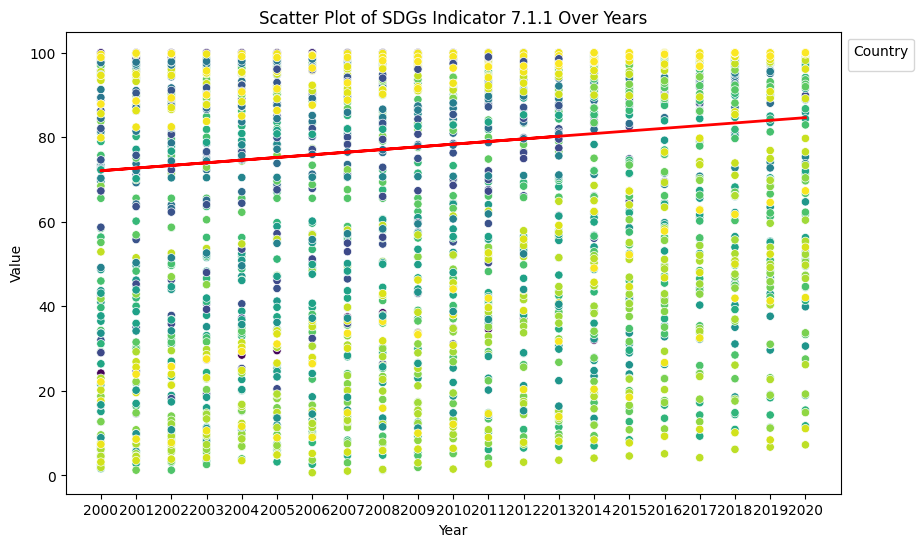

In [38]:
# Filter the dataframe for 'ancor-sdgs_711' values
filtered_df = df_final[df_final['Indicator Code'] == 'ancor-sdgs_711']

# Drop rows with missing values
filtered_df = filtered_df.dropna(subset=['Year', 'Value'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Year', y='Value', hue='Country', palette='viridis', legend=False)

# Fit linear regression model
X = filtered_df[['Year']]
y = filtered_df['Value']

# Set x-axis ticks to be integers
plt.xticks(filtered_df['Year'].unique())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

plt.title('Scatter Plot of SDGs Indicator 7.1.1 Over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()

### Scatterplot Indicators 7.1.2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


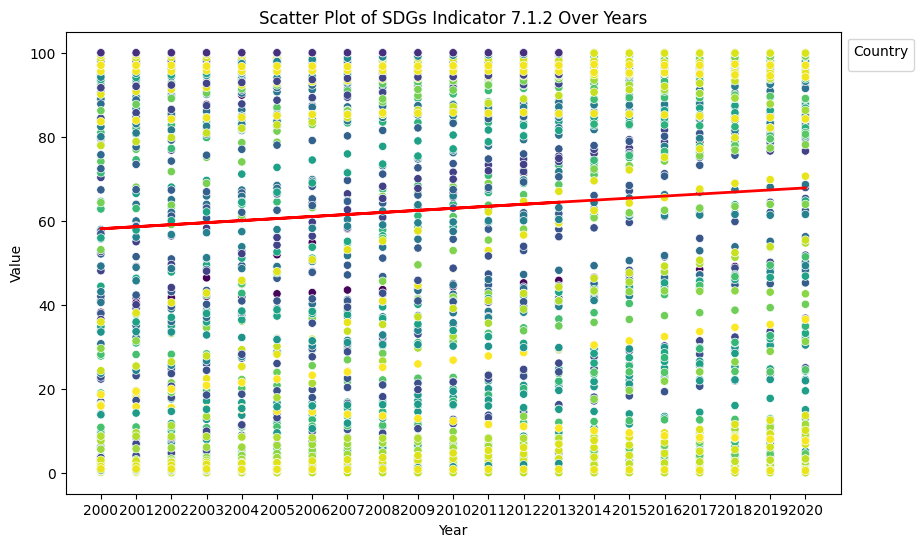

In [39]:
# Filter the dataframe for 'ancor-sdgs_712' values
filtered_df = df_final[df_final['Indicator Code'] == 'ancor-sdgs_712']

# Drop rows with missing values
filtered_df = filtered_df.dropna(subset=['Year', 'Value'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Year', y='Value', hue='Country', palette='viridis', legend=False)

# Fit linear regression model
X = filtered_df[['Year']]
y = filtered_df['Value']

# Set x-axis ticks to be integers
plt.xticks(filtered_df['Year'].unique())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

plt.title('Scatter Plot of SDGs Indicator 7.1.2 Over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


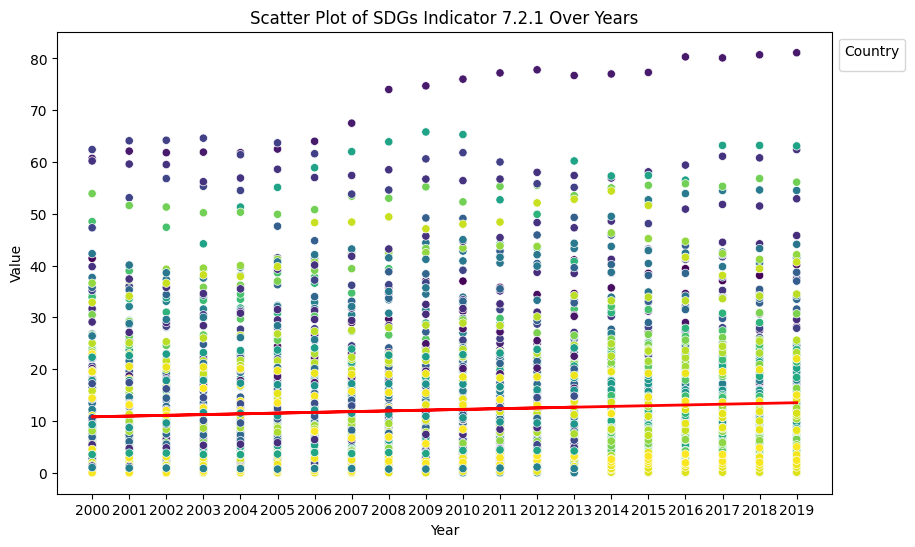

In [40]:
# Filter the dataframe for 'ancor-sdgs_711' values
filtered_df = df_final[df_final['Indicator Code'] == 'ancor-sdgs_721']

# Drop rows with missing values
filtered_df = filtered_df.dropna(subset=['Year', 'Value'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Year', y='Value', hue='Country', palette='viridis', legend=False)

# Fit linear regression model
X = filtered_df[['Year']]
y = filtered_df['Value']

# Set x-axis ticks to be integers
plt.xticks(filtered_df['Year'].unique())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

plt.title('Scatter Plot of SDGs Indicator 7.2.1 Over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()

## CPI vs ETI

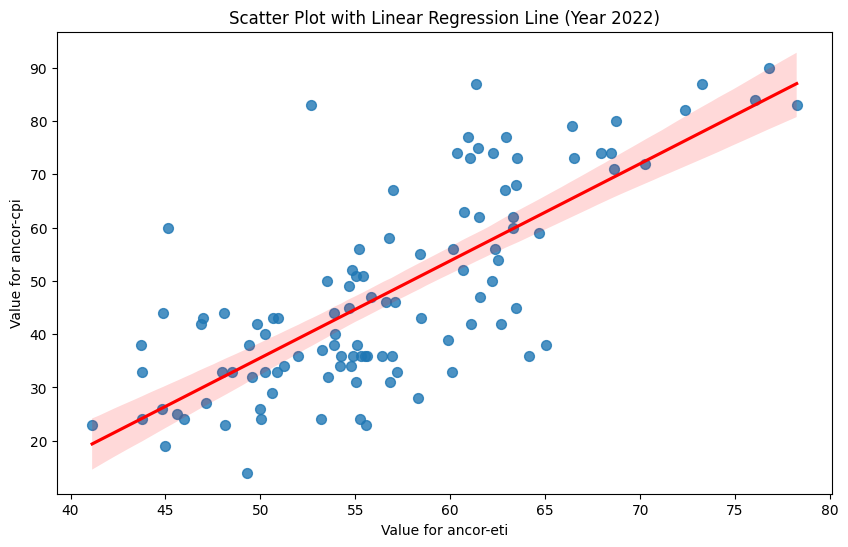

In [41]:
# Filter the dataframe for 'ancor-eti' values for the year 2022
df_ancor_eti = df_final[(df_final['Indicator Code'] == 'ancor-eti') & (df_final['Year'] == 2022)]

# Filter the dataframe for 'ancor-cpi' values for the year 2022
df_ancor_cpi = df_final[(df_final['Indicator Code'] == 'ancor-cpi') & (df_final['Year'] == 2022)]

# Merge the two DataFrames on 'Country' and 'Year'
merged_df = pd.merge(df_ancor_eti[['Country', 'Year', 'Value']], df_ancor_cpi[['Country', 'Year', 'Value']], on=['Country', 'Year'], suffixes=('_ancor_eti', '_ancor_cpi'))

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='Value_ancor_eti', y='Value_ancor_cpi', scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('Scatter Plot with Linear Regression Line (Year 2022)')
plt.xlabel('Value for ancor-eti')
plt.ylabel('Value for ancor-cpi')

# Show the plot
plt.show()

>energy indicators 7.1.1, 7.1.2, 7.2.1 

>correlation analysis - corruption perception index & ETI

>correlation analysis - proxy indicators on governance/quality of institutions (business integrity, trust, social contract) & ETI 

>find data on corruption, bribery, public procurement in the broader energy sector and within the energy transition and its sub-sections, control of corruption indicator, corruption barometer, V- Dem Index